In [19]:
pip install split-folders

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D, BatchNormalization,Dropout
from keras.applications import MobileNet
from keras.preprocessing import image
from keras.regularizers import l1
from keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

In [21]:
base_model=MobileNet(weights='imagenet',include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.
# base_model.Trainable=False
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu', kernel_regularizer=l1(0.001))(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
#x=BatchNormalization()(x)
x=Dropout(0.2)(x)
#x=Dense(1024,activation='relu', kernel_regularizer=l2(0.001))(x) #dense layer 2
#x=BatchNormalization()(x)
#x=Dropout(0.2)(x)
# x=Dense(1024,activation='relu', kernel_regularizer=l1(0.001))(x) #dense layer 3
# #x=BatchNormalization()(x)
# x=Dropout(0.2)(x)
x=Dense(512,activation='relu')(x) #dense layer 3
#x=BatchNormalization()(x)
#x=Dense(128,activation='relu')(x) #dense layer 3
#x=Dense(64,activation='relu')(x) #dense layer 3
#x=Dense(32,activation='relu')(x) #dense layer 3
#x=Dense(16,activation='relu')(x) #dense layer 3
#x=Dropout(0.2)(x)
preds=Dense(10,activation='softmax')(x) #final layer with softmax activation

In [22]:
model=Model(inputs=base_model.input,outputs=preds)
#specify the inputs
#specify the outputs
#now a model has been created based on our architecture

In [23]:
for layer in model.layers[:10]:
    layer.trainable=False
for layer in model.layers[10:]:
    layer.trainable=True

In [24]:
import splitfolders  # or import split_folders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio('/kaggle/input/datasetss/Tomato', output="output", seed=1337, ratio=(.8, .2), group_prefix=None) # default values

Copying files: 18151 files [00:33, 535.88 files/s] 


In [25]:

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input,  
                                 rotation_range=90,
#                                  width_shift_range=0.1,
#                                  height_shift_range=8.1,
#                                  shear_range=0.2,
#                                  zoom_range=0.2,
                                 horizontal_flip=True,
                                 vertical_flip=True,
#                                  featurewise_std_normalization=True,
#                                  fill_mode='nearest'      # Remplissage des pixels vides après transformation
)


train_generator=train_datagen.flow_from_directory('./output/train', # this is where you specify the path to the main data folder
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 14516 images belonging to 10 classes.


In [26]:
val_datagen=ImageDataGenerator(preprocessing_function=preprocess_input,  
                               rotation_range=90,
#                                width_shift_range=0.1,
#                                height_shift_range=8.1,
#                                shear_range=0.2,
#                                zoom_range=0.2,
                               horizontal_flip=True,
                               vertical_flip=True,
#                                featurewise_std_normalization=True,
#                                fill_mode='nearest'
) 

val_generator=train_datagen.flow_from_directory('./output/val', # this is where you specify the path to the main data folder
                                                 target_size=(256,256),
                                                 color_mode='rgb',
                                                 batch_size=32,
                                                 class_mode='categorical',
                                                 shuffle=True)

Found 3635 images belonging to 10 classes.


In [27]:
from tensorflow.keras.callbacks import ReduceLROnPlateau
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=1, min_lr=1e-5)

# Adam optimizer
# loss function will be categorical cross entropy
# evaluation metric will be accuracy

step_size_train=train_generator.n//train_generator.batch_size
accident_model=model.fit_generator(generator=train_generator,
                                   validation_data =val_generator,
                                   steps_per_epoch=step_size_train,
                                   callbacks=[reduce_lr],
                                   epochs=10)

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
453/453 [==============================] - 241s 528ms/step - loss: 10.2848 - accuracy: 0.7506 - val_loss: 0.9152 - val_accuracy: 0.8250
Epoch 2/10
453/453 [==============================] - 238s 526ms/step - loss: 0.6976 - accuracy: 0.8936 - val_loss: 0.6931 - val_accuracy: 0.8913
Epoch 3/10
453/453 [==============================] - 239s 526ms/step - loss: 0.5257 - accuracy: 0.9197 - val_loss: 0.5477 - val_accuracy: 0.8949
Epoch 4/10
453/453 [==============================] - 238s 526ms/step - loss: 0.4334 - accuracy: 0.9351 - val_loss: 4.7792 - val_accuracy: 0.4495
Epoch 5/10
453/453 [==============================] - 238s 526ms/step - loss: 0.4755 - accuracy: 0.9537 - val_loss: 0.1876 - val_accuracy: 0.9802
Epoch 6/10
453/453 [==============================] - 239s 527ms/step - loss: 0.2000 - accuracy: 0.9716 - val_loss: 0.1351 - val_accuracy: 0.9788
Epoch 7/10
453/453 [==============================] - 238s 525ms/step - loss: 0.1520 - accuracy: 0.9746 - val_loss: 0.1131 

In [28]:
model.evaluate(val_generator)

114/114 [==============================] - 47s 416ms/step - loss: 0.0850 - accuracy: 0.9857


[0.08501441776752472, 0.9856946468353271]

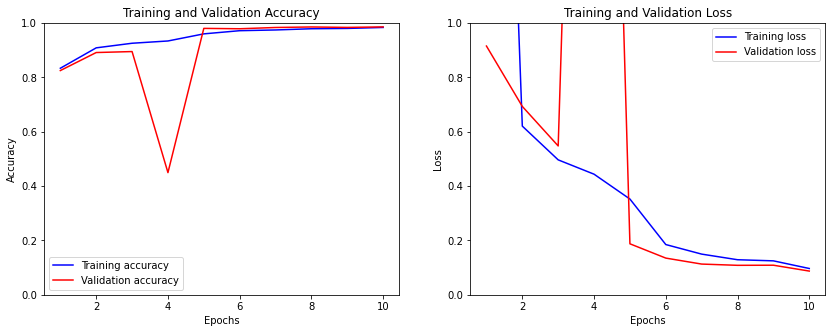

In [29]:
import matplotlib.pyplot as plt

# Extraction des données d'accuracy et de loss
train_accuracy = accident_model.history['accuracy']
val_accuracy = accident_model.history['val_accuracy']
train_loss = accident_model.history['loss']
val_loss = accident_model.history['val_loss']

epochs = range(1, len(train_accuracy) + 1)

# Plot de l'accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.legend()

# Plot de la loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0,1)
plt.show()

In [30]:
# plt.plot(accident_model.history['loss'], label = 'training loss')
# plt.plot(accident_model.history['accuracy'], label = 'training accuracy')
# plt.grid(True)
# plt.legend()

In [31]:
# plt.plot(accident_model.history['val_loss'], label = 'validation loss')
# plt.plot(accident_model.history['val_accuracy'], label = 'validation accuracy')
# plt.grid(True)
# plt.legend()

In [32]:
#model.save("mobilenet.h5") 

In [33]:
#from keras.models import load_model 

In [34]:
#model = load_model('mobilenet.h5')
# summarize model.
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
conv1 (Conv2D)               (None, None, None, 32)    864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, None, None, 32)    128       
_________________________________________________________________
conv1_relu (ReLU)            (None, None, None, 32)    0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)    288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, None, None, 32)    128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, None, None, 32)    0   

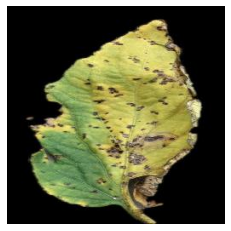

Predicted class name: Tomato___Septoria_leaf_spot
plant is diseased , it needs treatment
----------------------------------------


In [35]:
### from tensorflow.keras.preprocessing.image import load_img, img_to_array
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

#model = load_model('mobilenet.h5')
class_names = list(train_generator.class_indices.keys())
#print("Class Names:", class_names)
#print("-" * 40)
img_path = '/kaggle/input/datasetss/check_img/mrida.jpg'
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')  # Masquer les axes
plt.show()
img = load_img(img_path, target_size=(256, 256))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to create a batch
predictions = model.predict(img_array)
predicted_class_index = np.argmax(predictions[0])
predicted_class_name = class_names[predicted_class_index]
#print(predictions)
#print("-" * 40)
#print('Predicted class index:', predicted_class_index)
#print("-" * 40)
print('Predicted class name:', predicted_class_name)
#print("-" * 40)
if predicted_class_name == 'Tomato___healthy':
    print('plant is healthy, no need to do treatment')
else:
    print('plant is diseased , it needs treatment')
print("-" * 40)

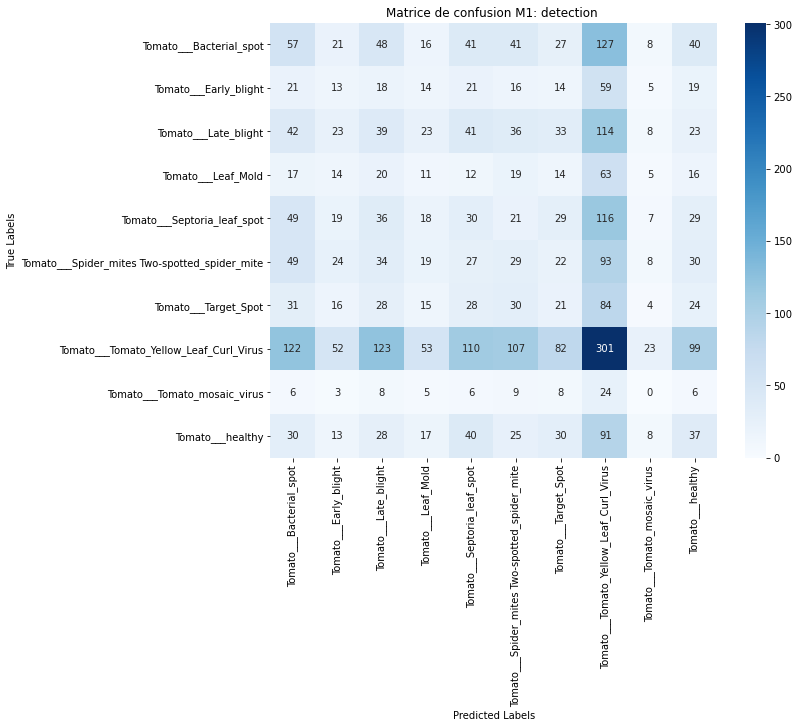

In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Make predictions
# Predict class probabilities for the validation set
val_predictions = model.predict(val_generator)

# Step 2: Convert predictions to class labels
# Get the class with the highest probability for each prediction
val_predicted_classes = np.argmax(val_predictions, axis=1)

# Step 3: Get true labels from the validation generator
# Since val_generator.classes gives the true labels of the validation data
val_true_classes = val_generator.classes

# Step 4: Generate the confusion matrix
conf_matrix = confusion_matrix(val_true_classes, val_predicted_classes)

# Step 5: Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.title('Matrice de confusion M1: detection ')
plt.show()